# Time Series for Hamilton Shelter Occupancy

In [1]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
from pathlib import Path
tody = date.today()

In [2]:
# file to load
file_to_load = Path("Resources/Shelter_Occupancy.csv")

# Read the csv into a dataframe
shelter_occupancy = pd.read_csv(file_to_load)

# Display the data
shelter_occupancy.head()

,OBJECTID,MONTH_YEAR,PERCENT_MEN,PERCENT_WOMEN,PERCENT_FAMILIES,PERCENT_YOUTH,PERCENT_EMERGENCY
0,1,2020/01/31 05:00:00+00,1.14,1.04,0.93,0.68,NaN
1,2,2020/02/28 05:00:00+00,1.11,1.02,0.91,0.60,NaN
2,3,2020/03/31 05:00:00+00,1.08,0.82,0.97,0.52,NaN
3,4,2020/04/30 05:00:00+00,1.39,0.87,0.95,0.70,0.44
4,5,2020/05/31 05:00:00+00,1.14,0.80,0.64,0.46,0.50


In [3]:
# Remove time from date
shelter_occupancy['MONTH_YEAR'] = pd.to_datetime(shelter_occupancy['MONTH_YEAR']).dt.date

# Display the data
shelter_occupancy.head()

,OBJECTID,MONTH_YEAR,PERCENT_MEN,PERCENT_WOMEN,PERCENT_FAMILIES,PERCENT_YOUTH,PERCENT_EMERGENCY
0,1,2020-01-31,1.14,1.04,0.93,0.68,NaN
1,2,2020-02-28,1.11,1.02,0.91,0.60,NaN
2,3,2020-03-31,1.08,0.82,0.97,0.52,NaN
3,4,2020-04-30,1.39,0.87,0.95,0.70,0.44
4,5,2020-05-31,1.14,0.80,0.64,0.46,0.50


In [4]:
# Format the 'Month_Year' column
shelter_occupancy['MONTH_YEAR'] = pd.to_datetime(shelter_occupancy['MONTH_YEAR'], format='%m/%d/%Y')

# Rename the 'Month_Year' column to 'Date'
shelter_occupancy.rename(columns={'MONTH_YEAR': 'Date'}, inplace=True)

# Set the 'Date' column as the index
shelter_occupancy.set_index('Date', inplace=True)

# Display the data
shelter_occupancy.head()


,OBJECTID,PERCENT_MEN,PERCENT_WOMEN,PERCENT_FAMILIES,PERCENT_YOUTH,PERCENT_EMERGENCY
Date,,,,,,
2020-01-31,1,1.14,1.04,0.93,0.68,NaN
2020-02-28,2,1.11,1.02,0.91,0.60,NaN
2020-03-31,3,1.08,0.82,0.97,0.52,NaN
2020-04-30,4,1.39,0.87,0.95,0.70,0.44
2020-05-31,5,1.14,0.80,0.64,0.46,0.50


In [5]:
# Remove column
shelter_occupancy = shelter_occupancy.drop(columns=['OBJECTID'])

# Display the data
shelter_occupancy.head()

,PERCENT_MEN,PERCENT_WOMEN,PERCENT_FAMILIES,PERCENT_YOUTH,PERCENT_EMERGENCY
Date,,,,,
2020-01-31,1.14,1.04,0.93,0.68,NaN
2020-02-28,1.11,1.02,0.91,0.60,NaN
2020-03-31,1.08,0.82,0.97,0.52,NaN
2020-04-30,1.39,0.87,0.95,0.70,0.44
2020-05-31,1.14,0.80,0.64,0.46,0.50


In [6]:
# Drop the null values
shelter_occupancy = shelter_occupancy.dropna()

# Display the data
shelter_occupancy.head()

,PERCENT_MEN,PERCENT_WOMEN,PERCENT_FAMILIES,PERCENT_YOUTH,PERCENT_EMERGENCY
Date,,,,,
2020-04-30,1.39,0.87,0.95,0.70,0.44
2020-05-31,1.14,0.80,0.64,0.46,0.50
2020-06-30,1.07,0.78,1.00,0.51,0.34
2020-07-31,0.91,0.78,1.00,0.42,0.31
2020-08-31,0.90,0.85,1.00,0.29,0.33


In [7]:
# Check data types
shelter_occupancy.dtypes

PERCENT_MEN          float64
PERCENT_WOMEN        float64
PERCENT_FAMILIES     float64
PERCENT_YOUTH        float64
PERCENT_EMERGENCY    float64
dtype: object

In [8]:
# Summary Stats

summary_stats = shelter_occupancy.describe()
print(summary_stats)

       PERCENT_MEN  PERCENT_WOMEN  PERCENT_FAMILIES  PERCENT_YOUTH  \
count    46.000000      46.000000         46.000000      46.000000   
mean      0.990652       0.950652          0.967174       0.579783   
std       0.115150       0.084101          0.092079       0.140024   
min       0.790000       0.720000          0.640000       0.290000   
25%       0.912500       0.902500          0.920000       0.462500   
50%       0.985000       0.970000          1.005000       0.585000   
75%       1.070000       0.990000          1.030000       0.685000   
max       1.390000       1.100000          1.140000       0.840000   

       PERCENT_EMERGENCY  
count          46.000000  
mean            0.735435  
std             0.207158  
min             0.310000  
25%             0.600000  
50%             0.745000  
75%             0.907500  
max             1.070000  


In [9]:
#Correlation
shelter_occupancy.corr()

,PERCENT_MEN,PERCENT_WOMEN,PERCENT_FAMILIES,PERCENT_YOUTH,PERCENT_EMERGENCY
PERCENT_MEN,1.000000,-0.191652,0.248538,0.417612,0.216069
PERCENT_WOMEN,-0.191652,1.000000,0.111873,0.263636,0.217013
PERCENT_FAMILIES,0.248538,0.111873,1.000000,0.481169,0.396575
PERCENT_YOUTH,0.417612,0.263636,0.481169,1.000000,0.430513
PERCENT_EMERGENCY,0.216069,0.217013,0.396575,0.430513,1.000000


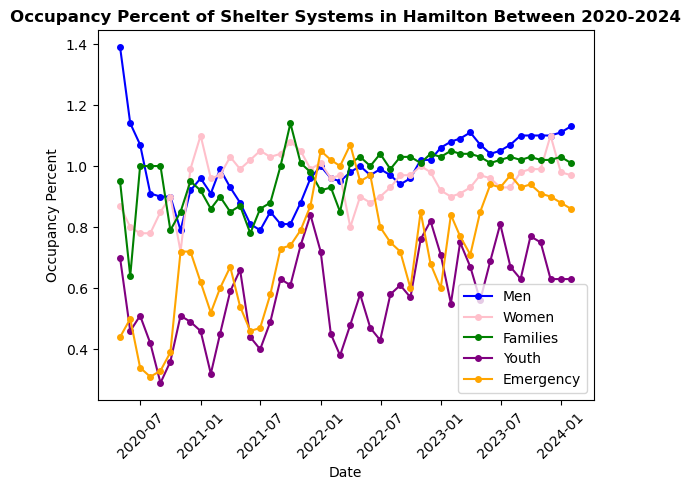

In [10]:
# Lines for plot
plt.plot(shelter_occupancy.index, shelter_occupancy['PERCENT_MEN'], color='blue', 
         marker='o', markersize=4, label='Men')
plt.plot(shelter_occupancy.index, shelter_occupancy['PERCENT_WOMEN'], color='pink', 
         marker='o', markersize=4, label='Women')
plt.plot(shelter_occupancy.index, shelter_occupancy['PERCENT_FAMILIES'], color='green', 
         marker='o', markersize=4, label='Families')
plt.plot(shelter_occupancy.index, shelter_occupancy['PERCENT_YOUTH'], color='purple', 
         marker='o', markersize=4, label='Youth')
plt.plot(shelter_occupancy.index, shelter_occupancy['PERCENT_EMERGENCY'], color='orange', 
         marker='o', markersize=4, label='Emergency')

# Title of the plot
plt.title('Occupancy Percent of Shelter Systems in Hamilton Between 2020-2024', fontweight='bold')

# Label for x and y axis
plt.xlabel('Date')
plt.ylabel('Occupancy Percent')


# Place x ticks
plt.xticks(rotation=45)

# Legend
plt.legend(loc='lower right')

# Save the plot
plt.savefig('Images/Occupancy Percent of Shelter Systems in Hamilton Between 2020-2024.png', bbox_inches='tight')

# Plot the data
plt.show()

In [11]:
# file to load
file = Path("Resources/Shelter_Beds_Available.csv")

# Read the csv into a dataframe
shelter_beds = pd.read_csv(file)

# Display the data
shelter_beds.head()

,OBJECTID,MONTH_YEAR,MEN_BEDS,WOMEN_BEDS,FAMILY_ROOMS,YOUTH_BEDS,EMERGENCY_HOTEL_OVERFLOW_ROOMS,TOTAL_BEDS,TOTAL_ROOMS
0,1,2020/01/31 05:00:00+00,220,46,20,21,0,287,20
1,2,2020/02/28 05:00:00+00,193,46,20,21,0,260,20
2,3,2020/03/31 05:00:00+00,219,46,20,21,0,286,20
3,4,2020/04/30 05:00:00+00,150,46,20,21,67,217,87
4,5,2020/05/31 05:00:00+00,127,46,20,21,43,194,63


In [12]:
# Remove time from date
shelter_beds['MONTH_YEAR'] = pd.to_datetime(shelter_beds['MONTH_YEAR']).dt.date

# Display the data
shelter_beds.head()

,OBJECTID,MONTH_YEAR,MEN_BEDS,WOMEN_BEDS,FAMILY_ROOMS,YOUTH_BEDS,EMERGENCY_HOTEL_OVERFLOW_ROOMS,TOTAL_BEDS,TOTAL_ROOMS
0,1,2020-01-31,220,46,20,21,0,287,20
1,2,2020-02-28,193,46,20,21,0,260,20
2,3,2020-03-31,219,46,20,21,0,286,20
3,4,2020-04-30,150,46,20,21,67,217,87
4,5,2020-05-31,127,46,20,21,43,194,63


In [13]:
# Format the 'Month_Year' column
shelter_beds['MONTH_YEAR'] = pd.to_datetime(shelter_beds['MONTH_YEAR'], format='%m/%d/%Y')

# Rename the 'Month_Year' column to 'Date'
shelter_beds.rename(columns={'MONTH_YEAR': 'Date'}, inplace=True)

# Set the 'Date' column as the index
shelter_beds.set_index('Date', inplace=True)

# Display the data
shelter_beds.head()

,OBJECTID,MEN_BEDS,WOMEN_BEDS,FAMILY_ROOMS,YOUTH_BEDS,EMERGENCY_HOTEL_OVERFLOW_ROOMS,TOTAL_BEDS,TOTAL_ROOMS
Date,,,,,,,,
2020-01-31,1,220,46,20,21,0,287,20
2020-02-28,2,193,46,20,21,0,260,20
2020-03-31,3,219,46,20,21,0,286,20
2020-04-30,4,150,46,20,21,67,217,87
2020-05-31,5,127,46,20,21,43,194,63


In [14]:
# Remove column
shelter_beds = shelter_beds.drop(columns=['OBJECTID'])

# Display the data
shelter_beds.head()

,MEN_BEDS,WOMEN_BEDS,FAMILY_ROOMS,YOUTH_BEDS,EMERGENCY_HOTEL_OVERFLOW_ROOMS,TOTAL_BEDS,TOTAL_ROOMS
Date,,,,,,,
2020-01-31,220,46,20,21,0,287,20
2020-02-28,193,46,20,21,0,260,20
2020-03-31,219,46,20,21,0,286,20
2020-04-30,150,46,20,21,67,217,87
2020-05-31,127,46,20,21,43,194,63


In [15]:
# Check data types
shelter_beds.dtypes

MEN_BEDS                          int64
WOMEN_BEDS                        int64
FAMILY_ROOMS                      int64
YOUTH_BEDS                        int64
EMERGENCY_HOTEL_OVERFLOW_ROOMS    int64
TOTAL_BEDS                        int64
TOTAL_ROOMS                       int64
dtype: object

In [16]:
# Summary Stats

summary_stats = shelter_beds.describe()
print(summary_stats)

         MEN_BEDS  WOMEN_BEDS  FAMILY_ROOMS  YOUTH_BEDS  \
count   49.000000   49.000000          49.0   49.000000   
mean   196.428571   59.040816          20.0   18.551020   
std     33.007575   29.993721           0.0    3.725259   
min    115.000000   26.000000          20.0   13.000000   
25%    193.000000   38.000000          20.0   13.000000   
50%    198.000000   46.000000          20.0   21.000000   
75%    219.000000   81.000000          20.0   21.000000   
max    245.000000  109.000000          20.0   21.000000   

       EMERGENCY_HOTEL_OVERFLOW_ROOMS  TOTAL_BEDS  TOTAL_ROOMS  
count                       49.000000   49.000000    49.000000  
mean                       107.959184  273.612245   127.959184  
std                         68.354761   44.766438    68.354761  
min                          0.000000  174.000000    20.000000  
25%                         52.000000  257.000000    72.000000  
50%                        104.000000  284.000000   124.000000  
75%          

In [17]:
# Correlation
shelter_beds.corr()

,MEN_BEDS,WOMEN_BEDS,FAMILY_ROOMS,YOUTH_BEDS,EMERGENCY_HOTEL_OVERFLOW_ROOMS,TOTAL_BEDS,TOTAL_ROOMS
MEN_BEDS,1.000000,-0.018178,NaN,-0.286771,0.256668,0.688153,0.256668
WOMEN_BEDS,-0.018178,1.000000,NaN,0.672148,-0.237901,0.710375,-0.237901
FAMILY_ROOMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YOUTH_BEDS,-0.286771,0.672148,NaN,1.000000,-0.549544,0.315994,-0.549544
EMERGENCY_HOTEL_OVERFLOW_ROOMS,0.256668,-0.237901,NaN,-0.549544,1.000000,-0.008257,1.000000
TOTAL_BEDS,0.688153,0.710375,NaN,0.315994,-0.008257,1.000000,-0.008257
TOTAL_ROOMS,0.256668,-0.237901,NaN,-0.549544,1.000000,-0.008257,1.000000


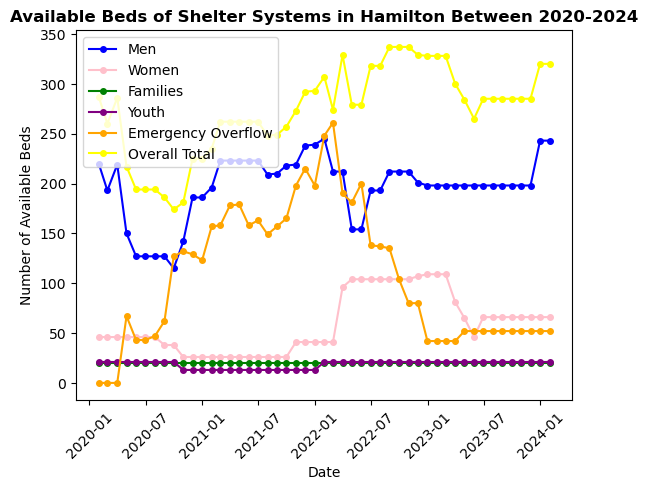

In [28]:
# Lines for plot
plt.plot(shelter_beds.index, shelter_beds['MEN_BEDS'], color='blue', 
         marker='o', markersize=4, label='Men')
plt.plot(shelter_beds.index, shelter_beds['WOMEN_BEDS'], color='pink', 
         marker='o', markersize=4, label='Women')
plt.plot(shelter_beds.index, shelter_beds['FAMILY_ROOMS'], color='green', 
         marker='o', markersize=4, label='Families')
plt.plot(shelter_beds.index, shelter_beds['YOUTH_BEDS'], color='purple', 
         marker='o', markersize=4, label='Youth')
plt.plot(shelter_beds.index, shelter_beds['EMERGENCY_HOTEL_OVERFLOW_ROOMS'], 
         color='orange', marker='o', markersize=4, label='Emergency Overflow')
plt.plot(shelter_beds.index, shelter_beds['TOTAL_BEDS'], color='yellow', 
         marker='o', markersize=4, label='Overall Total')

# Title of the plot
plt.title('Available Beds of Shelter Systems in Hamilton Between 2020-2024', fontweight='bold')

# Label for x and y axis
plt.xlabel('Date')
plt.ylabel('Number of Available Beds')

# Place x ticks
plt.xticks(rotation=45)

# Legend
plt.legend()

# Save the plot
plt.savefig('Images/Available Beds of Shelter Systems in Hamilton Between 2020-2024.png', bbox_inches='tight')

# Plot the data
plt.show()


In [20]:
# file to load
file_path = Path("Resources/Emergency Shelter Systems.xlsx")

# Read the excel file into a dataframe
shelter_system = pd.read_excel(file_path)

# Display the data
shelter_system.head()

,System,Number of Beds Per System
0,Men,198
1,Women,46
2,Family,80
3,Youth,21
4,Women Overflow,20


In [21]:
# Set system column as index
shelter_system.set_index('System', inplace=True)

# display data
shelter_system.head()

,Number of Beds Per System
System,
Men,198
Women,46
Family,80
Youth,21
Women Overflow,20


In [22]:
# Summary Stats

summary_stats = shelter_system.describe()
print(summary_stats)

       Number of Beds Per System
count                   6.000000
mean                   95.500000
std                    86.143485
min                    20.000000
25%                    27.250000
50%                    63.000000
75%                   168.500000
max                   208.000000


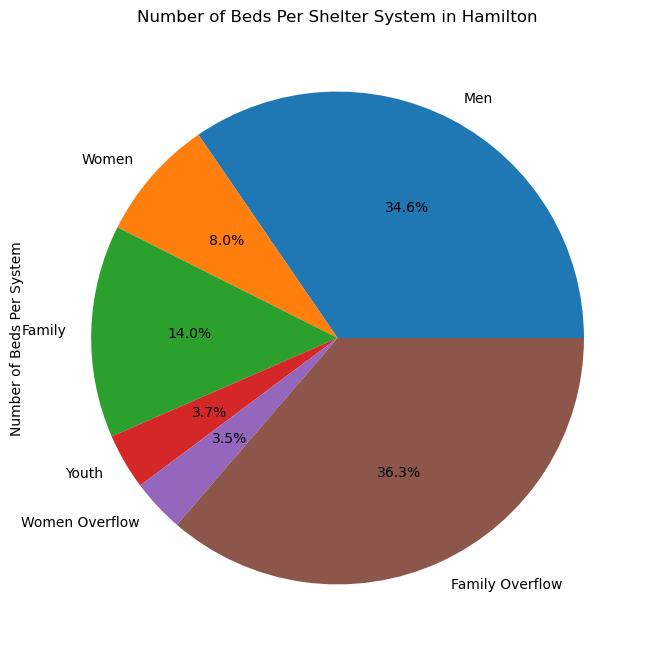

In [23]:
# Pie chart
shelter_system.plot(kind='pie', subplots=True, figsize=(8,8), autopct='%1.1f%%')

#Title of plot
plt.title('Number of Beds Per Shelter System in Hamilton')

#Remove legend
plt.legend().remove()

# Save the plot
plt.savefig('Images/Number of Beds Per Shelter System in Hamilton.png', bbox_inches='tight')

#Show plot
plt.show()


In [24]:
# file to load
load = Path("Resources/Shelter Turnaway.xlsx")

# Read the csv into a dataframe
shelter_turnaway = pd.read_excel(load)

# Display the data
shelter_turnaway.head()

,Reason for Turnaway,Number of Turnaways
0,Court Order,4
1,Decided not to Stay,56
2,Difficult to Serve,31
3,Diversion Successful,328
4,Has Other Housing,139


In [25]:
# Set system column as index
shelter_turnaway.set_index('Reason for Turnaway', inplace=True)

# display data
shelter_turnaway.head()

,Number of Turnaways
Reason for Turnaway,
Court Order,4
Decided not to Stay,56
Difficult to Serve,31
Diversion Successful,328
Has Other Housing,139


In [26]:
# Summary Stats

summary_stats = shelter_turnaway.describe()
print(summary_stats)

       Number of Turnaways
count            19.000000
mean            251.684211
std             494.436610
min               1.000000
25%               5.000000
50%              31.000000
75%             266.500000
max            2095.000000


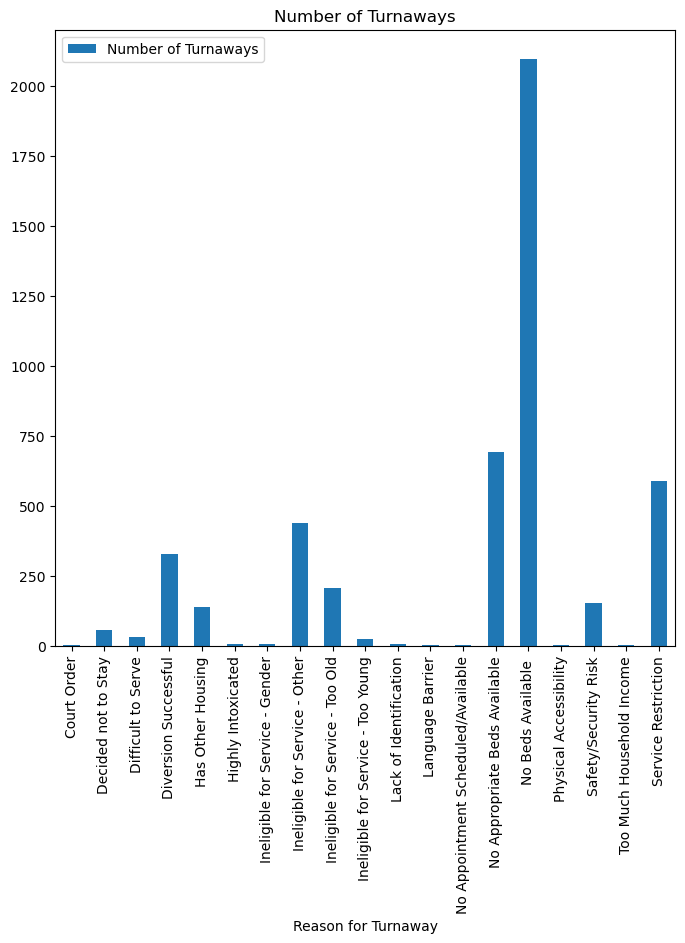

In [27]:
# pie chart
shelter_turnaway.plot(kind='bar', subplots=True, figsize=(8,8))

#show plot
plt.show()